In [1]:
import pandas as pd
import geopandas as gpd

data = pd.read_csv('../data/DocklessTripOpenData_10.csv')
print('Creating Timeseries...')
date_str = data[['StartDate', 'StartTime']].apply(lambda x: str(x[0]) + ' ' + str(x[1]).replace('24:', '00:'), axis=1)
data['date'] = pd.to_datetime(date_str)
study_area = gpd.read_file('../shapes/utils/Dockless Vehicle Service Area/Dockless_Vehicle_Service_Area.shp').to_crs('EPSG:4326')
study_area_polygon = study_area.loc[0, 'geometry']

Creating Timeseries...


In [2]:
from shapely.geometry import Point
convert_to_point = lambda p: Point(p[0], p[1])
def get_starting_locations(df, crs='EPSG:4326'):
    return gpd.GeoSeries(df[['StartLongitude', 'StartLatitude']].apply(convert_to_point, axis=1),
                                    crs=crs)
def get_ending_locations(df, crs='EPSG:4326'):
    return gpd.GeoSeries(df[['EndLongitude', 'EndLatitude']].apply(convert_to_point, axis=1),
                                crs=crs)

In [111]:
arrivals = gpd.read_file('../shapes/arrivals/arrivals.shp')

In [112]:
arrivals['date'] = pd.to_datetime(arrivals['date'])
arrivals['date'].dt.month.value_counts()

8     61174
9     60782
7     60722
6     49924
5     48780
10    46423
4     34025
Name: date, dtype: int64

In [50]:
import numpy as np
arrivals = arrivals[(arrivals['date'].dt.month >= 4) & (arrivals['date'].dt.month <= 10)]
arrivals_sum = arrivals.groupby([arrivals['date'].dt.date,
                              arrivals['date'].dt.dayofweek,
                              arrivals['date'].dt.hour]).size()
index_0 = arrivals_sum.index.get_level_values(0).unique()
new_index = new_index = pd.MultiIndex.from_product([index_0, np.array(range(7)), np.array(range(24))], names=('date', 'day', 'hour'))
arrivals_sum = arrivals_sum.reindex(new_index, fill_value=0)

In [ ]:
arrivals.groupby(arrivals['date'].dt.dayofweek, arrivals[''])

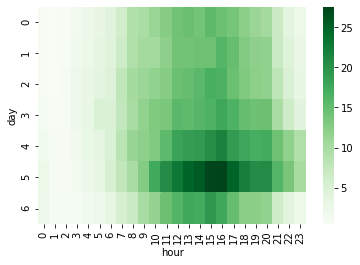

In [57]:
import seaborn as sns

ratios = arrivals_sum.to_frame('count').reset_index().groupby(['day', 'hour'])['count'].mean().unstack()
sns.heatmap(ratios, cmap='Greens')

In [62]:
(ratios.sum(1) * 6 * 4).sum()

40579.06542056074

In [69]:
arrivals_sum = arrivals.groupby([arrivals['date'].dt.date,
                              arrivals['date'].dt.dayofweek,
                              arrivals['date'].dt.hour]).size()
arrivals_sum.index.names = ['date', 'day', 'hour']


In [73]:
arrivals_count = arrivals_sum.to_frame('count').reset_index()

In [81]:
ratios = arrivals_count.groupby(['day', 'hour'])['count'].mean().unstack()

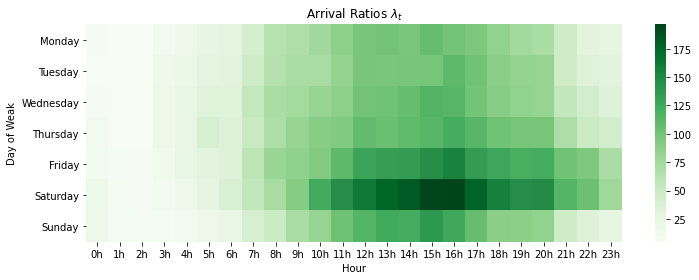

In [110]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 4))
sns.heatmap(ratios, square=False, cmap='Greens')
ax.set_yticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=0)
ax.set_xticklabels(['{}h'.format(h) for h in range(0, 24)])
ax.set_xlabel('Hour')
ax.set_ylabel('Day of Weak')
ax.set_title('Arrival Ratios $\lambda_{t}$')
fig.savefig('../figures/arrival-ratios.png', dpi=300);